In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/TSF_Intern/Task_6/Iris.csv')

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df=df.drop('Id',axis=1)

In [6]:
df.shape

(150, 5)

We can see that there are 150 datapoints and 4 features :


1.  SepalLengthCm
2.   SepalWidthCm
3.   PetalLengthCm
4.PetalWidthCm





The three classes of flowers are 
1. Iris-setosa
2. Iris-versicolor
3.Iris-virginica

In [7]:
df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [11]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.25,random_state=12,shuffle=True)

In [12]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
62,6.0,2.2,4.0,1.0
98,5.1,2.5,3.0,1.1
26,5.0,3.4,1.6,0.4
8,4.4,2.9,1.4,0.2


In [13]:
y_train.head()

14        Iris-setosa
62    Iris-versicolor
98    Iris-versicolor
26        Iris-setosa
8         Iris-setosa
Name: Species, dtype: object

In [14]:
x_train.shape

(112, 4)

In [15]:
y_train.shape

(112,)

# **Decision tree**

Instantiating Decision tree from sklearn.tree

Decision tree using GINI impurity measure

In [18]:
Dtree_gini=DecisionTreeClassifier(criterion="gini",random_state=0,splitter='best')
Dtree_gini.fit(x_train,y_train)
y_pred_train=Dtree_gini.predict(x_train)
y_pred_test=Dtree_gini.predict(x_test)
print(f"Training accuracy score ---> {accuracy_score(y_pred_train,y_train)*100:.6f}")
print(f"Testing accuracy score ---> {accuracy_score(y_pred_test,y_test)*100:.6f}")

Training accuracy score ---> 100.000000
Testing accuracy score ---> 97.368421


In [20]:
print("<-------------------------Training Confusion Matrix---------------------->")
print(confusion_matrix(y_pred_train,y_train))

<-------------------------Training Confusion Matrix---------------------->
[[35  0  0]
 [ 0 38  0]
 [ 0  0 39]]


In [21]:
print("<-------------------------Testing Confusion Matrix---------------------->")
print(confusion_matrix(y_pred_test,y_test))

<-------------------------Testing Confusion Matrix---------------------->
[[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


In [22]:
print("<-------------------------Training Classification Report---------------------->")
print(classification_report(y_pred_train,y_train))

<-------------------------Training Classification Report---------------------->
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       1.00      1.00      1.00        38
 Iris-virginica       1.00      1.00      1.00        39

       accuracy                           1.00       112
      macro avg       1.00      1.00      1.00       112
   weighted avg       1.00      1.00      1.00       112



In [23]:
print("<-------------------------Testing Classification Report---------------------->")
print(classification_report(y_pred_test,y_test))

<-------------------------Testing Classification Report---------------------->
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [24]:
!pip install pydotplus
!apt-get install graphviz -y
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


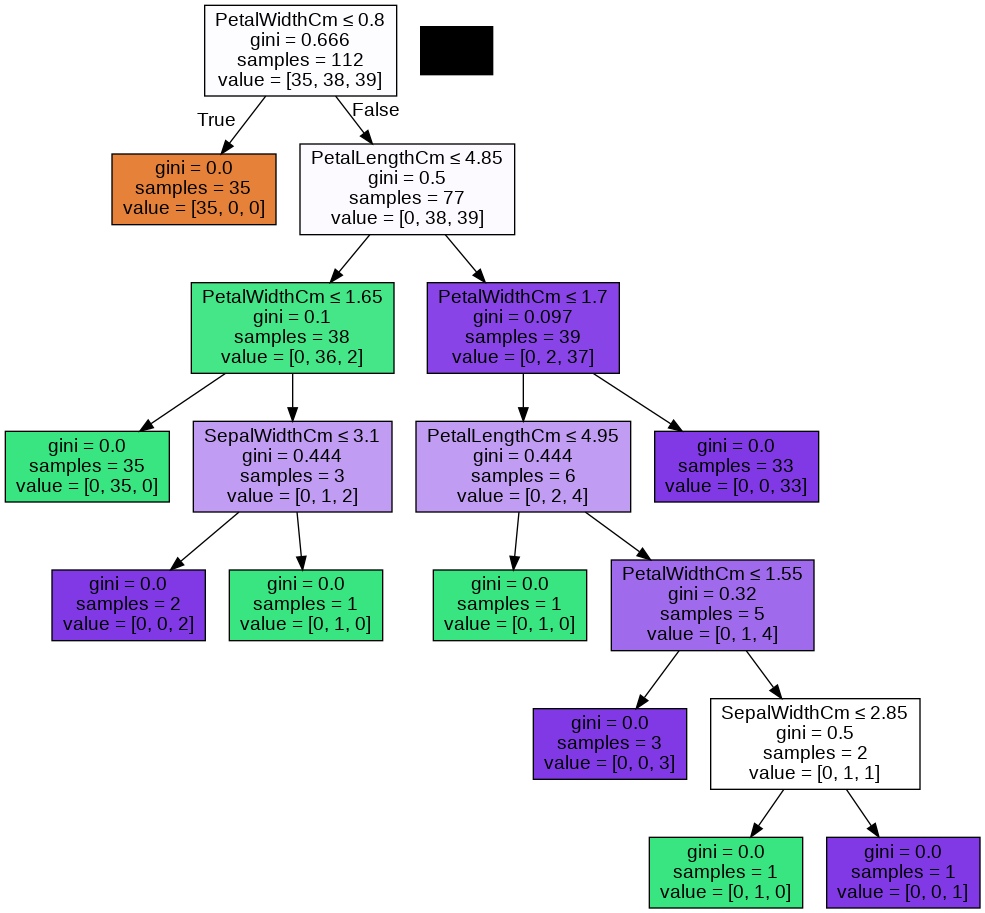

In [25]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(Dtree_gini, out_file=dot_data, feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                filled=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Decision tree with entropy as impurity measure

In [26]:

x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.25,random_state=55,shuffle=True)

In [27]:
Dtree_entr=DecisionTreeClassifier(criterion="entropy",random_state=0,splitter='best')
Dtree_entr.fit(x_train,y_train)
y_pred_train=Dtree_entr.predict(x_train)
y_pred_test=Dtree_entr.predict(x_test)
print(f"Training accuracy score ---> {accuracy_score(y_pred_train,y_train)*100:.6f}")
print(f"Training accuracy score ---> {accuracy_score(y_pred_test,y_test)*100:.6f}")

Training accuracy score ---> 100.000000
Training accuracy score ---> 97.368421


In [28]:
print("<-------------------------Training Confusion Matrix---------------------->")
confusion_matrix(y_pred_train,y_train)

<-------------------------Training Confusion Matrix---------------------->


array([[37,  0,  0],
       [ 0, 38,  0],
       [ 0,  0, 37]])

In [29]:
print("<-------------------------Testing Confusion Matrix---------------------->")
confusion_matrix(y_pred_test,y_test)

<-------------------------Testing Confusion Matrix---------------------->


array([[13,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 13]])

In [30]:
print("<-------------------------Training Classification Report---------------------->")
print(classification_report(y_pred_train,y_train))

<-------------------------Training Classification Report---------------------->
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       1.00      1.00      1.00        38
 Iris-virginica       1.00      1.00      1.00        37

       accuracy                           1.00       112
      macro avg       1.00      1.00      1.00       112
   weighted avg       1.00      1.00      1.00       112



In [31]:
print("<-------------------------Testing Classification Report---------------------->")
print(classification_report(y_pred_test,y_test))

<-------------------------Testing Classification Report---------------------->
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



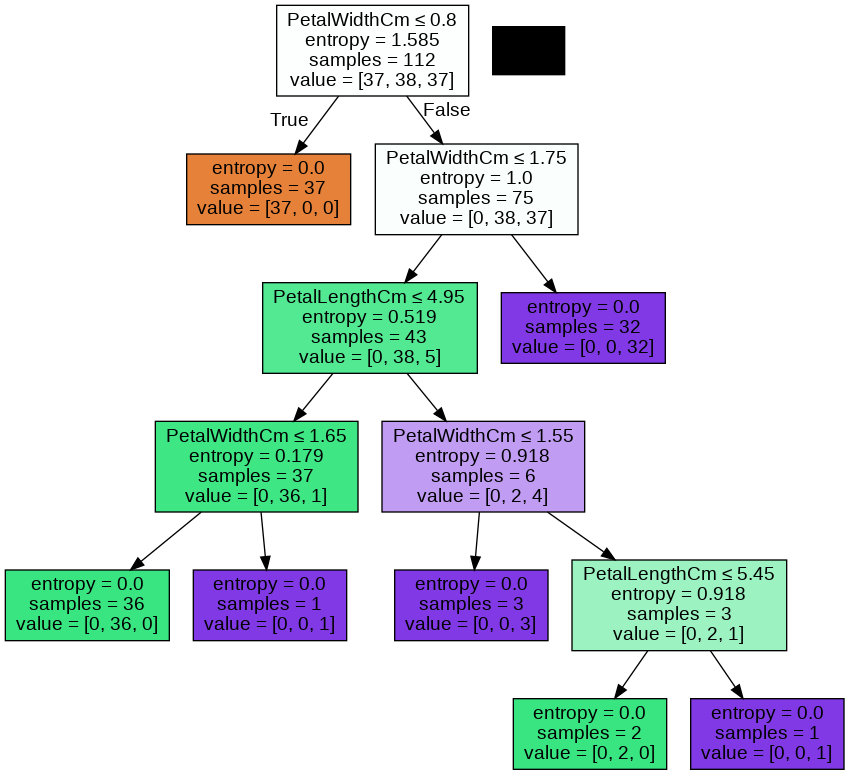

In [32]:
dot_data = StringIO()
export_graphviz(Dtree_entr, out_file=dot_data, feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                filled=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())